In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url="scikit-learn.NonLinearRegression.csv"
df = pd.read_csv(url)
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


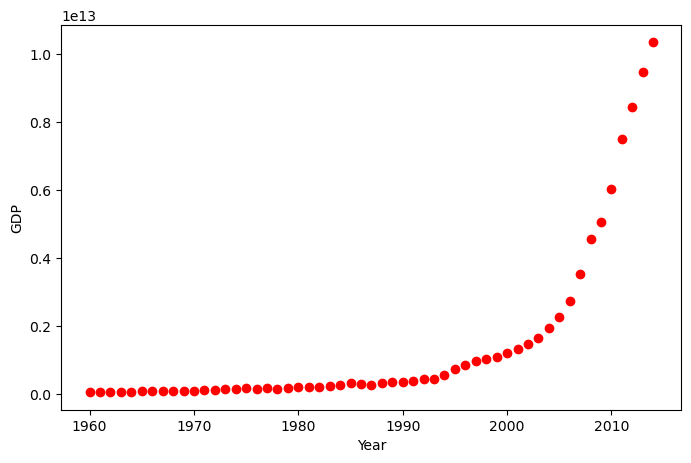

In [3]:
plt.figure(figsize=(8,5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

In [4]:
x = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [6]:
yhat = model.predict(x)

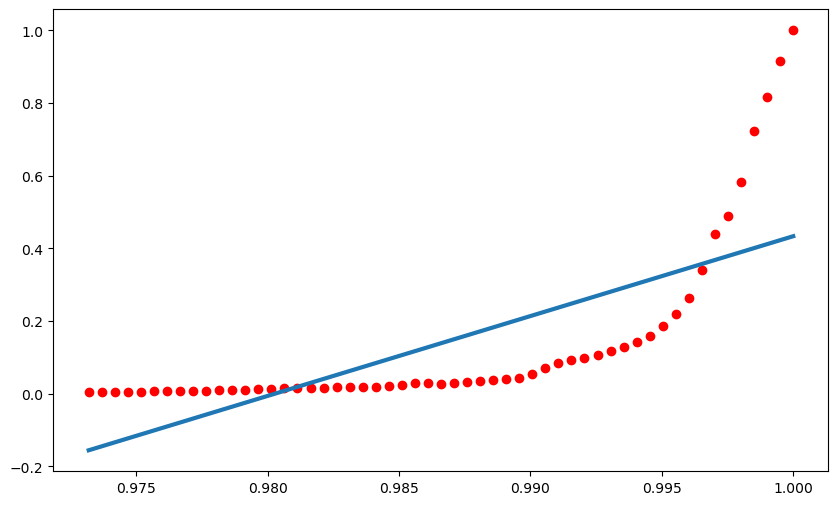

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro', label='data')
plt.plot(x, yhat, linewidth=3, label='fit')
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(yhat,y))

ValueError: Input contains NaN.

In [21]:
x[0]

array([0.97318769])

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(x)

In [19]:
model.fit(X_poly, y)

ValueError: Input y contains NaN.

In [23]:
yhat = model.predict(X_poly)

ValueError: X has 5 features, but LinearRegression is expecting 1 features as input.

In [24]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X,yhat, linewidth=4.0, label='fit')
plt.show()

NameError: name 'X' is not defined

<Figure size 1000x600 with 0 Axes>

In [25]:
print("MAE:", mean_absolute_error(yhat,y))

ValueError: Input contains NaN.

In [26]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [27]:
def sigmoid(x, Beta_1, Beta_2):
 y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
 return y


In [28]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517118227653
beta2=0.9972071272524615


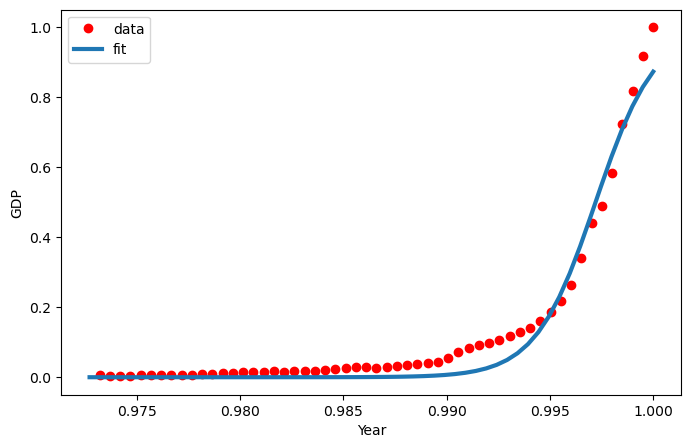

In [29]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


In [30]:
print("MAE:", mean_absolute_error(yhat,ydata))

MAE: 0.03049841883900717
